# Mid-Course Project

Hi There, and thanks for your help. If you're reading this you've been selected to help on a secret initiative.

You will be helping us analyze a portion of data from a company we want to acquire, which could greatly improve the fortunes of Maven Mega Mart.

We'll be working with `project_transactions.csv` and briefly take a look at `product.csv`.

First, read in the transactions data and explore it.

* Take a look at the raw data, the datatypes, and cast `DAY`, `QUANTITY`, `STORE_ID`, and `WEEK_NO` columns to the smallest appropriate datatype. Check the memory reduction by doing so.
* Is there any missing data?
* How many unique households and products are there in the data? The fields household_key and Product_ID will help here.

In [2]:
import pandas as pd
import numpy as np

In [3]:
# load project transaction csv
transactions = pd.read_csv("../project_data/project_transactions.csv")
transactions.head()

,household_key,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,WEEK_NO,COUPON_DISC,COUPON_MATCH_DISC
0,1364,26984896261,1,842930,1,2.19,31742,0.00,1,0.0,0.0
1,1364,26984896261,1,897044,1,2.99,31742,-0.40,1,0.0,0.0
2,1364,26984896261,1,920955,1,3.09,31742,0.00,1,0.0,0.0
3,1364,26984896261,1,937406,1,2.50,31742,-0.99,1,0.0,0.0
4,1364,26984896261,1,981760,1,0.60,31742,-0.79,1,0.0,0.0


In [4]:
# see memory usage for transaction DataFrame
transactions.info(memory_usage="deep", show_counts=True)
# Key Values are
# dtypes: float64(4), int64(7)
# memory usage: 180.1 MB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2146311 entries, 0 to 2146310
Data columns (total 11 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   household_key      2146311 non-null  int64  
 1   BASKET_ID          2146311 non-null  int64  
 2   DAY                2146311 non-null  int64  
 3   PRODUCT_ID         2146311 non-null  int64  
 4   QUANTITY           2146311 non-null  int64  
 5   SALES_VALUE        2146311 non-null  float64
 6   STORE_ID           2146311 non-null  int64  
 7   RETAIL_DISC        2146311 non-null  float64
 8   WEEK_NO            2146311 non-null  int64  
 9   COUPON_DISC        2146311 non-null  float64
 10  COUPON_MATCH_DISC  2146311 non-null  float64
dtypes: float64(4), int64(7)
memory usage: 180.1 MB


In [5]:
# Get summary Statistics to see datapoints
transactions.describe().round()

,household_key,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,WEEK_NO,COUPON_DISC,COUPON_MATCH_DISC
count,2146311.0,2.146311e+06,2146311.0,2146311.0,2146311.0,2146311.0,2146311.0,2146311.0,2146311.0,2146311.0,2146311.0
mean,1056.0,3.404897e+10,390.0,2884715.0,101.0,3.0,3268.0,-1.0,56.0,-0.0,-0.0
std,605.0,4.723748e+09,190.0,3831949.0,1152.0,4.0,9122.0,1.0,27.0,0.0,0.0
min,1.0,2.698490e+10,1.0,25671.0,0.0,0.0,1.0,-130.0,1.0,-56.0,-8.0
25%,548.0,3.040798e+10,229.0,917231.0,1.0,1.0,330.0,-1.0,33.0,0.0,0.0
50%,1042.0,3.281176e+10,392.0,1027960.0,1.0,2.0,372.0,0.0,57.0,0.0,0.0
75%,1581.0,4.012804e+10,555.0,1132771.0,1.0,3.0,422.0,0.0,80.0,0.0,0.0
max,2099.0,4.230536e+10,711.0,18316298.0,89638.0,840.0,34280.0,4.0,102.0,0.0,0.0


In [6]:

# for Transactions cast `DAY`, `QUANTITY`, `STORE_ID`, and `WEEK_NO` columns to the smallest appropriate datatype
transactions['DAY'] = transactions['DAY'].astype('int16')
transactions['QUANTITY'] = transactions['QUANTITY'].astype('int32')
transactions['STORE_ID'] = transactions['STORE_ID'].astype('int32')
transactions['WEEK_NO'] = transactions['WEEK_NO'].astype('int8')
transactions.info(memory_usage="deep", show_counts=True)
# previous Memory 
# memory usage: 180.1 MB
# updated Memory 
# memory usage: 122.8 MB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2146311 entries, 0 to 2146310
Data columns (total 11 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   household_key      2146311 non-null  int64  
 1   BASKET_ID          2146311 non-null  int64  
 2   DAY                2146311 non-null  int16  
 3   PRODUCT_ID         2146311 non-null  int64  
 4   QUANTITY           2146311 non-null  int32  
 5   SALES_VALUE        2146311 non-null  float64
 6   STORE_ID           2146311 non-null  int32  
 7   RETAIL_DISC        2146311 non-null  float64
 8   WEEK_NO            2146311 non-null  int8   
 9   COUPON_DISC        2146311 non-null  float64
 10  COUPON_MATCH_DISC  2146311 non-null  float64
dtypes: float64(4), int16(1), int32(2), int64(3), int8(1)
memory usage: 137.1 MB


In [7]:
# Is there missing data
# check nulls
transactions.isnull().sum()

household_key        0
BASKET_ID            0
DAY                  0
PRODUCT_ID           0
QUANTITY             0
SALES_VALUE          0
STORE_ID             0
RETAIL_DISC          0
WEEK_NO              0
COUPON_DISC          0
COUPON_MATCH_DISC    0
dtype: int64

In [8]:
# unique households and products are there in the data?
# use .nunique() to find number of unique values
print('Unique Households')
print(transactions['household_key'].nunique())
print('Unique Products')
print(transactions['PRODUCT_ID'].nunique())

Unique Households
2099
Unique Products
84138


## Column Creation

Create two columns:

* A column that captures the `total_discount` by row (sum of `RETAIL_DISC`, `COUPON_DISC`)
* The percentage discount (`total_discount` / `SALES_VALUE`). Make sure this is positive (try `.abs()`).
* If the percentage discount is greater than 1, set it equal to 1. If it is less than 0, set it to 0. 
* Drop the individual discount columns (`RETAIL_DISC`, `COUPON_DISC`, `COUPON_MATCH_DISC`).

Feel free to overwrite the existing transaction DataFrame after making the modifications above.

In [9]:
# create column that for  `total_discount` by row (sum of `RETAIL_DISC`, `COUPON_DISC`)
transactions['total_discount'] = (transactions['RETAIL_DISC'] + transactions['COUPON_DISC'])

In [10]:
# Create percentage discount column (`total_discount` / `SALES_VALUE`). Make sure this is positive (try `.abs()`).
# for percentage discount greater than 1, set it equal to 1. If it is less than 0, set it to 0. 
# chain use of np.where for salesvalue == 0 set percent_discount column as zero 
# else use absolute value of operation
transactions['percent_discount'] = np.where(
    transactions['SALES_VALUE'] == 0, 0, np.where(
        (transactions['total_discount']/transactions['SALES_VALUE']).abs() > 1, 1, (transactions['total_discount']/transactions['SALES_VALUE']).abs()
        )
    )


# use np.where for calcuated discount_percent values over 1 to set value as 1, else leave as previous value
# transactions['percent_discount'] = np.where(
#     transactions['percent_discount'] > 1.0, 1.0, transactions['percent_discount'])

In [11]:
# Drop the individual discount columns (`RETAIL_DISC`, `COUPON_DISC`, `COUPON_MATCH_DISC`).
transactions = transactions.drop(columns=['RETAIL_DISC', 'COUPON_DISC', 'COUPON_MATCH_DISC'])

In [12]:
transactions.head()

,household_key,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,WEEK_NO,total_discount,percent_discount
0,1364,26984896261,1,842930,1,2.19,31742,1,0.00,0.000000
1,1364,26984896261,1,897044,1,2.99,31742,1,-0.40,0.133779
2,1364,26984896261,1,920955,1,3.09,31742,1,0.00,0.000000
3,1364,26984896261,1,937406,1,2.50,31742,1,-0.99,0.396000
4,1364,26984896261,1,981760,1,0.60,31742,1,-0.79,1.000000


In [13]:
transactions.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2146311 entries, 0 to 2146310
Data columns (total 10 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   household_key     2146311 non-null  int64  
 1   BASKET_ID         2146311 non-null  int64  
 2   DAY               2146311 non-null  int16  
 3   PRODUCT_ID        2146311 non-null  int64  
 4   QUANTITY          2146311 non-null  int32  
 5   SALES_VALUE       2146311 non-null  float64
 6   STORE_ID          2146311 non-null  int32  
 7   WEEK_NO           2146311 non-null  int8   
 8   total_discount    2146311 non-null  float64
 9   percent_discount  2146311 non-null  float64
dtypes: float64(3), int16(1), int32(2), int64(3), int8(1)
memory usage: 120.8 MB


## Overall Statistics

Calculate:

* The total sales (sum of `SALES_VALUE`), 
* Total discount (sum of `total_discount`)
* Overall percentage discount (sum of total_discount / sum of sales value)
* Total quantity sold (sum of `QUANTITY`).
* Max quantity sold in a single row. Inspect the row as well. Does this have a high discount percentage?
* Total sales value per basket (sum of sales value / nunique basket_id).
* Total sales value per household (sum of sales value / nunique household_key). 

In [14]:
# The total sales (sum of `SALES_VALUE`)
sales_total = (transactions['SALES_VALUE'].sum().round(2))
print(f'Total amount of Sales is ${sales_total}')
# Total discount (sum of `total_discount`) 
discount_total = (transactions['total_discount'].sum().round(2))
print(f'Total Discount amount is ${discount_total}')
# Overall percentage discount (sum of total_discount / sum of sales value)
percent_discount_total = (discount_total/sales_total).round(2)
print(f'Overall Discount Percent is {percent_discount_total}')
# Total quantity sold (sum of `QUANTITY`)
quantity_total = transactions['QUANTITY'].sum()
print(f'Total quantity sold is {quantity_total} items')

Total amount of Sales is $6666243.5
Total Discount amount is $-1178658.08
Overall Discount Percent is -0.18
Total quantity sold is 216713611 items


In [15]:
# Max quantity sold in a single row. Inspect the row as well. Does this have a high discount percentage?
max_quantity = transactions['QUANTITY'].max()
print(f'Max quantity value sold is {max_quantity}')


Max quantity value sold is 89638


In [16]:
# Explore row with max_quantity, does it have a high discount percent?
# create boolean mask for row data
max_mask = transactions['QUANTITY'].isin([max_quantity])
# display row data
transactions[max_mask]
# has a low discount percent of 0.0538


,household_key,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,WEEK_NO,total_discount,percent_discount
1442095,630,34749153595,503,6534178,89638,250.0,384,73,-13.45,0.0538


In [17]:
# Total sales value per basket (sum of sales value / nunique basket_id).
sales_per_basket = (sales_total/(transactions['BASKET_ID'].nunique())).round(2)
print(f'There are {sales_per_basket} Sales per Basket')
# Total sales value per household (sum of sales value / nunique household_key). 
sales_per_household_key = (sales_total/(transactions['household_key'].nunique())).round(2)
print(f'There are {sales_per_household_key} Sales per House Hold Key')

There are 28.62 Sales per Basket
There are 3175.91 Sales per House Hold Key


## Household Analysis

* Plot the distribution of total sales value purchased at the household level. 
* What were the top 10 households by quantity purchased?
* What were the top 10 households by sales value?
* Plot the total sales value for our top 10 households by value, ordered from highest to lowest.


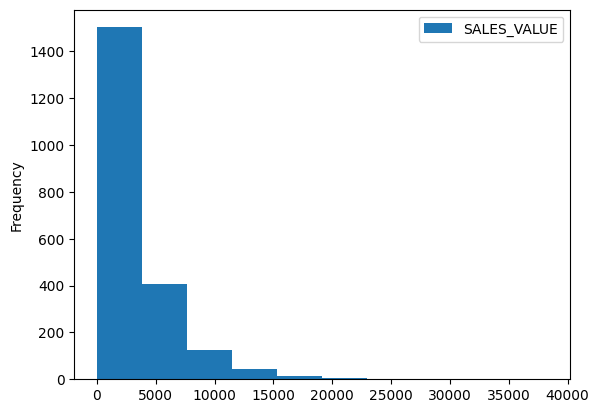

In [18]:
# Plot the distribution of total sales value purchased at the household level
(transactions
    .groupby(['household_key'])[['SALES_VALUE']]
    .sum()
    .plot.hist()
);

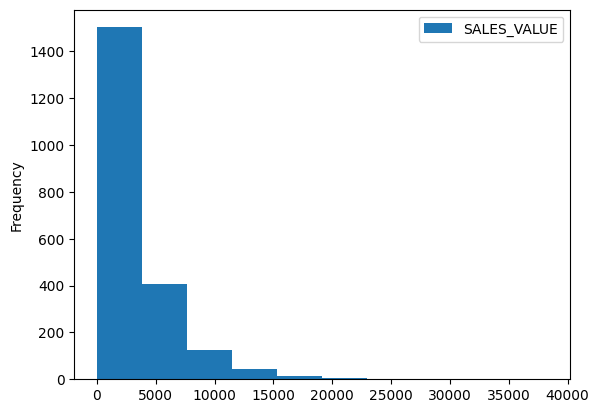

In [19]:
####### OR USE .agg function with dictionary
# Plot the distribution of total sales value purchased at the household level
(transactions
    .groupby("household_key")
    .agg({'SALES_VALUE': 'sum'})
    .plot.hist());

In [20]:
#  What were the top 10 households by quantity purchased?
# Create variable for groupby method, sorting by quantity descending
top10_hh_quant = (transactions
        .groupby("household_key")
        .agg({'QUANTITY': 'sum'})
    ).sort_values(by=['QUANTITY'], ascending=False)

# use iloc[] accessor to filter top 10 values
top10_hh_quant.iloc[:10]

,QUANTITY
household_key,
1023,4479917
755,3141769
1609,2146715
13,1863829
1430,1741892
1527,1734632
1762,1669880
707,1640193
1029,1496204


In [21]:
# What were the top 10 households by sales value?
# Create variable for groupby method, sorting by quantity descending
top10_hh_sales = (transactions
        .groupby("household_key")
        .agg({'SALES_VALUE': 'sum'})
    ).sort_values(by=['SALES_VALUE'], ascending=False)

# use iloc[] accessor to filter top 10 values
top10_hh_sales.iloc[:10]

,SALES_VALUE
household_key,
1023,38319.79
1609,27859.68
1453,21661.29
1430,20352.99
718,19299.86
707,19194.42
1653,19153.75
1111,18894.72
982,18790.34


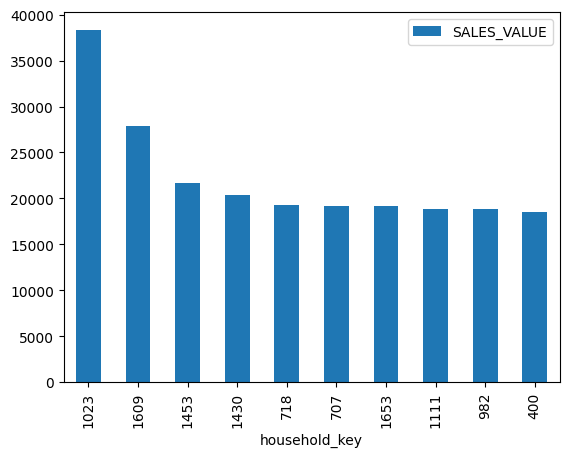

In [22]:
# Plot the total sales value for our top 10 households by value, ordered from highest to lowest.
top10_hh_sales.iloc[:10].plot.bar();

## Product Analysis

* Which products had the most sales by sales_value? Plot  a horizontal bar chart.
* Did the top 10 selling items have a higher than average discount rate?
* What was the most common `PRODUCT_ID` among rows with the households in our top 10 households by sales value?
* Look up the names of the  top 10 products by sales in the `products.csv` dataset.
* Look up the product name of the item that had the highest quantity sold in a single row.

In [23]:
transactions.head()

,household_key,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,WEEK_NO,total_discount,percent_discount
0,1364,26984896261,1,842930,1,2.19,31742,1,0.00,0.000000
1,1364,26984896261,1,897044,1,2.99,31742,1,-0.40,0.133779
2,1364,26984896261,1,920955,1,3.09,31742,1,0.00,0.000000
3,1364,26984896261,1,937406,1,2.50,31742,1,-0.99,0.396000
4,1364,26984896261,1,981760,1,0.60,31742,1,-0.79,1.000000


In [55]:
# Which products had the most sales by sales_value? 

top10_products = transactions.pivot_table(
        index='PRODUCT_ID',
        aggfunc={'SALES_VALUE':'sum'}
    ).sort_values(by=['SALES_VALUE'], ascending=False).iloc[:10,]

top10_products

,SALES_VALUE
PRODUCT_ID,
6534178,420154.13
6533889,42339.31
1029743,33894.75
1082185,24149.79
6533765,23831.14
6534166,23755.70
1106523,22931.01
916122,22749.02
995242,21229.72


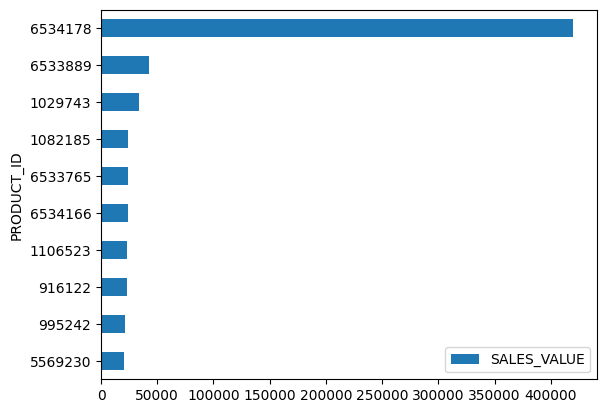

In [58]:
# Plot  a horizontal bar chart
top10_products.sort_values(by=['SALES_VALUE'], ascending=True).plot.barh();

In [38]:
# Did the top 10 selling items have a higher than average discount rate?
# calculate mean of percent_discount column
mean_percent_discount = transactions.loc[:,'total_discount'].mean()
mean_percent_discount

-0.5491553088065988

In [40]:
# Did the top 10 selling items have a higher than average discount rate?

top10_products_disc = transactions.pivot_table(
        index='PRODUCT_ID',
        aggfunc={'SALES_VALUE':'sum', 'total_discount':'sum'}
    ).sort_values(by=['SALES_VALUE'], ascending=False).iloc[:10,]

top10_products_disc

,SALES_VALUE,total_discount
PRODUCT_ID,,
6534178,420154.13,-14234.18
6533889,42339.31,-1445.68
1029743,33894.75,-2175.06
1082185,24149.79,-1869.56
6533765,23831.14,0.00
6534166,23755.70,-787.44
1106523,22931.01,-1427.76
916122,22749.02,-23687.81
995242,21229.72,-11363.71


In [50]:
#calculate average discount for the top 10 products
print(f'Percent Discount for entire Product Catalog Sales is \n\n{mean_percent_discount}\n')
print('Top 10 Product Sales Percent Discount is')
(top10_products_disc['total_discount'].sum())/(top10_products_disc['SALES_VALUE'].sum())

Percent Discount for entire Product Catalog Sales is 

-0.5491553088065988

Top 10 Product Sales Percent Discount is


-0.10331267387397927

In [51]:
# load project product csv
product = pd.read_csv("../project_data/product.csv")
product.head()

,PRODUCT_ID,MANUFACTURER,DEPARTMENT,BRAND,COMMODITY_DESC,SUB_COMMODITY_DESC,CURR_SIZE_OF_PRODUCT
0,25671,2,GROCERY,National,FRZN ICE,ICE - CRUSHED/CUBED,22 LB
1,26081,2,MISC. TRANS.,National,NO COMMODITY DESCRIPTION,NO SUBCOMMODITY DESCRIPTION,
2,26093,69,PASTRY,Private,BREAD,BREAD:ITALIAN/FRENCH,
3,26190,69,GROCERY,Private,FRUIT - SHELF STABLE,APPLE SAUCE,50 OZ
4,26355,69,GROCERY,Private,COOKIES/CONES,SPECIALTY COOKIES,14 OZ


In [61]:
# Look up the names of the  top 10 products by sales in the `products.csv` dataset.
product[product['PRODUCT_ID'].isin(top10_products.index)]

,PRODUCT_ID,MANUFACTURER,DEPARTMENT,BRAND,COMMODITY_DESC,SUB_COMMODITY_DESC,CURR_SIZE_OF_PRODUCT
16863,916122,4314,MEAT,National,CHICKEN,CHICKEN BREAST BONELESS,
25754,995242,69,GROCERY,Private,FLUID MILK PRODUCTS,FLUID MILK WHITE ONLY,
29657,1029743,69,GROCERY,Private,FLUID MILK PRODUCTS,FLUID MILK WHITE ONLY,1 GA
35576,1082185,2,PRODUCE,National,TROPICAL FRUIT,BANANAS,40 LB
38262,1106523,69,GROCERY,Private,FLUID MILK PRODUCTS,FLUID MILK WHITE ONLY,1 GA
53097,5569230,1208,GROCERY,National,SOFT DRINKS,SOFT DRINKS 12/18&15PK CAN CAR,12 OZ
57171,6533765,69,KIOSK-GAS,Private,FUEL,GASOLINE-REG UNLEADED,
57181,6533889,69,MISC SALES TRAN,Private,COUPON/MISC ITEMS,GASOLINE-REG UNLEADED,
57216,6534166,69,MISC SALES TRAN,Private,COUPON/MISC ITEMS,GASOLINE-REG UNLEADED,
57221,6534178,69,KIOSK-GAS,Private,COUPON/MISC ITEMS,GASOLINE-REG UNLEADED,


In [64]:
# Look up the product name of the item that had the highest quantity sold in a single row.

product[product['PRODUCT_ID'].isin(top10_products.iloc[:1,].index)]

,PRODUCT_ID,MANUFACTURER,DEPARTMENT,BRAND,COMMODITY_DESC,SUB_COMMODITY_DESC,CURR_SIZE_OF_PRODUCT
57221,6534178,69,KIOSK-GAS,Private,COUPON/MISC ITEMS,GASOLINE-REG UNLEADED,


In [66]:
####### OR .query() typing the top product id

In [67]:
product.query("PRODUCT_ID == 6534178")

,PRODUCT_ID,MANUFACTURER,DEPARTMENT,BRAND,COMMODITY_DESC,SUB_COMMODITY_DESC,CURR_SIZE_OF_PRODUCT
57221,6534178,69,KIOSK-GAS,Private,COUPON/MISC ITEMS,GASOLINE-REG UNLEADED,
